# langages de script – Python

## Numpy

### M2 Ingénierie Multilingue – INaLCO

clement.plancq@ens.psl.eu


Numpy est un des packages les plus utilisés de Python. Il ajoute au langage le support des tableaux multidimensionnels (`ndarray`) et du calcul matriciel.

## Installation

`python -m pip install numpy --user`

ou

`conda install numpy`

## Import

In [2]:
import numpy as np

Ne faites pas autrement, c'est devenu une formule conscacrée.

In [3]:
print(np.__version__)

1.19.1


## `ndarray`

Le grand apport de numpy ce sont les *array* (classe `ndarray`), à une dimension (vecteur), deux dimensions (matrices) ou 3 et plus (tensor).  
Un *array* sera plus rapide et plus compact (moins de taille en mémoire) qu'une liste Python.  
Numpy ajoute plein de fonctions pour manipuler ses *array* de façon optimisée. À tel point qu'il est recommandé de ne pas utiliser de boucle pour les manipuler.

On peut créer un *array* à partir d'une liste (ou d'un tuple) :

In [200]:
a = np.array([1, 2, 3, 4, 5, 6]) # une dimension

ou d'une liste de listes

In [202]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]) #deux dimensions

MAIS à la différence d'une liste, un *array* aura les caractéristiques suivantes :
  - une taille fixe (donnée à la création)
  - ses éléments doivent tous être de même type

### infos sur les `ndarray`

Pour avoir des infos sur les *array* que vous manipulez vous avez :
  - `dtype` (type des éléments)

In [28]:
b.dtype

dtype('int64')

  - `ndim` (le nombre de dimensions)

In [29]:
print(a.ndim)
print(b.ndim)

1
2


  - `size` (le nombre d'éléments)

In [30]:
b.size

12

  - `shape` (un tuple avec la taille de chaque dimension)

In [31]:
b.shape

(3, 4)

### Créer un *array*

 - `np.zeros`

In [32]:
np.zeros(4)

array([0., 0., 0., 0.])

 - np.ones

In [36]:
np.ones(3)

array([1., 1., 1.])

 - np.arange

In [39]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

 - np.linspace(start, stop) (crée un *array* avec des valeurs réparties uniformément entre start et stop (50 valeurs par défaut))

In [41]:
np.linspace(0, 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

 - np.empty (crée un array vide, enfin avec des valeurs aléatoires)

In [51]:
np.empty(8)

array([4.67373611e-310, 0.00000000e+000, 2.37663529e-312, 2.56761491e-312,
       1.08221785e-312, 1.08221785e-312, 1.57076904e-076, 6.98071760e-076])

### *indexing*, *slicing*

  - Comme pour les listes Python

In [52]:
a[4]

5

In [53]:
a[:2]

array([1, 2])

  - Au-delà d'une dimension il y a une syntaxe différente

In [55]:
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [58]:
b[1,1] # 2e ligne, 2e colonne

6

In [59]:
b[1,:] # 2e ligne, toutes les colonnes

array([5, 6, 7, 8])

In [ ]:
b[:,3] # 4e colonne, toutes les lignes

  - On peut aussi faire du slicing avec des conditions (oui comme dans pandas)

In [83]:
a[a > 2]

array([3, 4, 5, 6])

In [84]:
a[a%2 == 0]

array([2, 4, 6])

## Changer de dimension

In [62]:
c = np.arange(6)
print(c)

[0 1 2 3 4 5]


In [65]:
c.reshape(2, 3) # j'en fais une matrice de 2 lignes et 3 colonnes

array([[0, 1, 2],
       [3, 4, 5]])

In [72]:
print(c.flatten()) # on revient à une dimension

[0 1 2 3 4 5]


In [75]:
c[:,np.newaxis] # hop on ajoute une dimension

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [207]:
c2 = c.reshape(2, 3)
print(c2)
c2.T # transposition (lignes deviennent colonnes et colonnes deviennent lignes)

[[10 11 12]
 [13 14 15]]


array([[10, 13],
       [11, 14],
       [12, 15]])

## Opérations

  - les trucs classiques

In [85]:
a.sum()

21

In [86]:
a.max()

6

In [87]:
a.min()

1

In [88]:
c = np.arange(10,16)

 - opérations sur *array* à une dimension

In [90]:
a + c

array([11, 13, 15, 17, 19, 21])

In [92]:
a - c

array([-9, -9, -9, -9, -9, -9])

In [93]:
a * c

array([10, 22, 36, 52, 70, 90])

In [94]:
a / c

array([0.1       , 0.18181818, 0.25      , 0.30769231, 0.35714286,
       0.4       ])

  - produit matriciel

In [109]:
m1 = np.array([[1, 2],[ 3, 4]])

In [183]:
m2 = np.array([[5, 6],[ 7, 8]])

In [186]:
m1@m2

array([[19, 22],
       [43, 50]])

In [174]:
np.dot(m1, m2)

array([[19, 22],
       [43, 50]])

## Matplotlib

Les deux packages sont très copains, c'est très simple d'afficher des graphiques à partir de données numpy.

In [116]:
import matplotlib.pyplot as plt

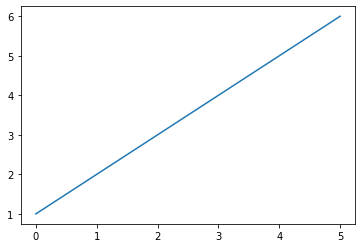

In [128]:
%matplotlib inline
plt.plot(a)

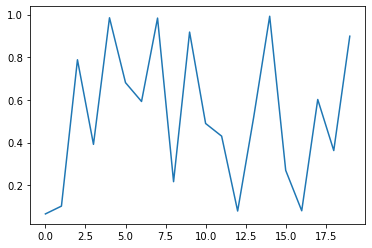

In [124]:
plt.plot(np.random.random(20))

Après dès qu'on veut faire des trucs un peu plus compliqué ben ça devient plus compliqué matplotlib.

Mais on peut aussi faire des trucs fun assez facilement. Exemple avec une image.  
`plt.imread` permet de changer un fichier image en objet python… devinez lequel

In [192]:
im = plt.imread("data/the-queens-gambit.jpeg")
type(im)

numpy.ndarray

Bingo, un *array* numpy. En même temps c'est jamais qu'une matrice de pixels une image. 

In [132]:
im.shape

(1142, 1692, 3)

Un *array* à trois dimensions : X, Y (les coordonnées du pixel) et la valeur RGB du pixel

In [212]:
# le pixel 200*200 par exemple est un array de 3 éléments (r,g,b) :
im[200,200]

array([13, 15, 12], dtype=uint8)

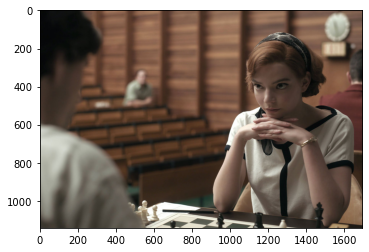

In [193]:
plt.imshow(im) # Oui on peut voir l'image aussi

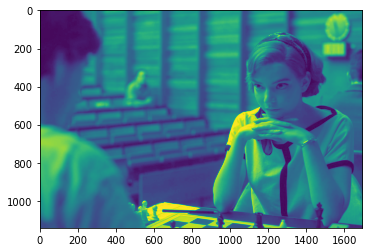

In [213]:
# si je ne prends que la valeur de R dans RGB j'obtiens des niveaux de gris (ça marche aussi pour G ou B)
plt.imshow(im[:,:,0])

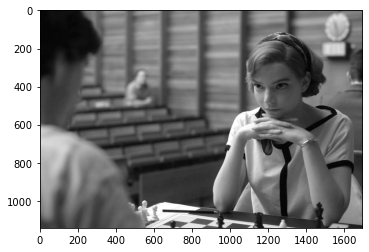

In [199]:
# magie
plt.imshow(im[:,:,0], cmap=plt.get_cmap('gray'))

Si vous voulez en savoir plus je vous invite à consulter les pages : 
 - https://matplotlib.org/tutorials/introductory/images.html
 - https://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/